In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Okt

In [3]:
from eunjeon import Mecab

In [4]:
import time

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
okt = Okt()
mecab = Mecab()

In [7]:
df = pd.read_csv('add_content.csv',index_col = 0)
df

,작성일,code,투자의견,idx.1,report
idx,,,,,
473108,2018-04-18,88350,buy,473108,년 월 일 기업분석건설유틸리티 한화생명 기업이슈 브리프보험 년 월 일 ...
380646,2016-05-23,92070,buy,380646,Microsoft PowerPoint 반도체산업전망 veditingFFpptxCo...
329427,2014-07-29,270,buy,329427,Microsoft Word CUNITdoc기아차 Q Review 하반기 해볼만하...
519412,2019-04-03,35720,buy,519412,년 월 일 기업분석건설유틸리티 카카오 기업이슈 브리프인터넷게임 년 월 ...
391416,2016-09-12,20560,buy,391416,Microsoft Word 아시아나항공 Research Center ...
...,...,...,...,...,...
272705,2011-11-14,830,strongbuy,272705,Microsoft Word Type산업건설엔지니어링doc 중...
272587,2011-11-11,97230,strongbuy,272587,DFFFDCDCFCDFBFBEFFBEBEFBAEABAECCFFBCADCABFFBEB...
272570,2011-11-10,210,strongbuy,272570,Microsoft Word IBSPPRdoc wwwwooriwmcom 분기 실...


In [8]:
x = df.report
y = df.투자의견

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
import re

def han_text_clean(text):
    text = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", text)
   
    return text

with open('stopwords-ko.txt', 'r', encoding = 'utf-8') as f:
    sw1 = f.read()
    sw1 = re.sub('\\n', ' ', sw1)
    sw1 = sw1.split()

stop_report = '리서치센터  Compliance Notice 본 조사분석자료는 제3자에게 사전 제공된 사실이 없습니다. 당사는 자료작성일 현재 본 조사분석자료에 언급된 종목의 지분을 1% 이상 보유하고 있지 않습니다. \
본 자료를 작성한 애널리스트는 자료작성일 현재 해당 종목과 재산적 이해관계가 없습니다. 본 자료에 게재된 내용은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭 없이 신의 성실하게 작성되었음을 확인합니다. \
본 자료는 투자자들의 투자판단에 참고가 되는 정보제공을 목적으로 배포되는 자료입니다. 본 자료에 수록된 내용은 당사 리서치센터의 추정치로서 오차가 발생할 수 있으며 정확성이나 완벽성은 보장하지 않습니다. \
본 자료를 이용하시는 분은 본 자료와 관련한 투자의 최종 결정은 자신의 판단으로 하시기 바랍니다. 따라서 어떠한 경우에도 본 자료는 투자 결과와 관련한 법적 책임소재의 증빙자료로 사용될 수 없습니다. \
본 조사분석자료는 당사 고객에 한하여 배포되는 자료로 당사의 허락 없이 복사, 대여, 배포 될 수 없습니다.\
투자등급 이 자료에 게재된 내용들은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭없이 작성되었음을 확인합니다.(작성자 : 하준두) 자료 제공일 현재\
당사는 상기 회사가 발행한 주식을 1% 이상 보유하고 있지 않습니다. 자료 제공일 현재 당사는 지난 1년간 상기 회사의 최초 증권시장 상장시 대표 주관사로 참여한 적이 없습니다. \
자료제공일 현재 조사분석 담당자는 상기회사가 발행한 주식 및 주식관련사채에 대하여 규정상 고지하여야 할 재산적 이해관계가 없으며, 추천의견을 제시함에 있어 어떠한 금전적 보상과도 연계되어 있지 않습니다. \
당자료는 상기 회사 및 상기회사의 유가증권에 대한 조사분석담당자의 의견을 정확히 반영하고있으나 이는 자료제공일 현재 시점에서의 의견 및 추정치로서 실적치와 오차가 발생할 수 있으며, \
투자를 유도할 목적이 아니라 투자자의 투자판단에 참고가 되는 정보제공을 목적으로 하고 있습니다. 따라서 종목의 선택이나 투자의 최종결정은 투자자 자신의 판단으로 하시기 바랍니다. \
Analyst, 증권,한화투자증권, 하이투자증권, 대신증권, SK증권, IBK투자증권, 키움증권, 이베스트증권,유안타증권, 메리츠증권, 유진투자증권, 카카오페이증권, 한양증권, 하나금융투자, 교보증권, \
현대차투자증권, 메리츠종금증권, 삼성증권, KTB투자증권, 신한금융투자, 한국투자증권,미래에셋대우, KB증권, 미래에셋증권, 하나대투증권, HMC투자증권, NH농협증권, 현대증권,\
동양증권, KDB대우증권, 이트레이드증권, 우리투자증권, 하이증권, 우리증권, 신한금융,대우증권, NH증권, 유진증권, 한투증권, 한화증권, 한화투자증권, 작성자, 한화리서치, 기업, 코멘트,Microsoft, Word,PowerPoint,IBSPPRdoc,CUNITdoc'

stop_report = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", stop_report)
sw2 = okt.nouns(han_text_clean(stop_report))
stopwords = sw1 + sw2

In [12]:
def nouns_tokenizer(clean_report):
    raw_nouns = okt.nouns(clean_report)
    nouns = [w for w in raw_nouns if (not w in stopwords) & (len(w) > 1)]
    return nouns

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

<AxesSubplot:>

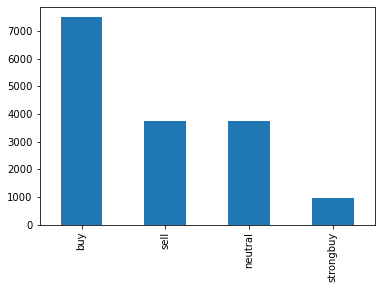

In [13]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

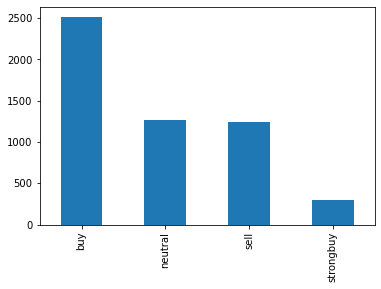

In [14]:
y_test.value_counts().plot(kind='bar')

In [39]:
import time

In [43]:
%%time

tfidf_vect = TfidfVectorizer(tokenizer=nouns_tokenizer, min_df = 100,max_df =0.7, \
                             max_features = 10000)
matrix = tfidf_vect.fit(x_train).toarray()

Wall time: 1h 32min 23s


In [44]:
matrix.shape

(15945, 6124)

In [45]:
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

In [46]:
tfidf_vect.get_feature_names()

['가가',
 '가감',
 '가격',
 '가계',
 '가계부채',
 '가공',
 '가공비',
 '가공품',
 '가구',
 '가기',
 '가까이',
 '가년',
 '가늠',
 '가능',
 '가능성',
 '가도',
 '가동',
 '가드',
 '가량',
 '가로',
 '가맹',
 '가면',
 '가물',
 '가뭄',
 '가미',
 '가방',
 '가배',
 '가변',
 '가비',
 '가사',
 '가산',
 '가상',
 '가상현실',
 '가성',
 '가성소다',
 '가세',
 '가속',
 '가속도',
 '가솔린',
 '가수',
 '가스',
 '가스전',
 '가스터빈',
 '가시',
 '가액',
 '가야',
 '가연',
 '가열',
 '가온',
 '가용',
 '가우',
 '가운데',
 '가원',
 '가율',
 '가을',
 '가의',
 '가이던스',
 '가이드',
 '가이드라인',
 '가인',
 '가입',
 '가입자',
 '가장',
 '가전',
 '가전제품',
 '가정',
 '가정은',
 '가제',
 '가족',
 '가죽',
 '가중',
 '가지',
 '가처분',
 '가처분소득',
 '가치',
 '가치주',
 '가칭',
 '가파르',
 '가파른',
 '가폰',
 '가해',
 '가형',
 '각광',
 '각국',
 '각기',
 '각도',
 '각형',
 '간격',
 '간과',
 '간다',
 '간사',
 '간소화',
 '간염',
 '간의',
 '간접',
 '간주',
 '간편',
 '간편식',
 '갈등',
 '갈수록',
 '감가상각',
 '감가상각비',
 '감각',
 '감기',
 '감당',
 '감독',
 '감리',
 '감마',
 '감사',
 '감산',
 '감성',
 '감속',
 '감수',
 '감시',
 '감안',
 '감액',
 '감염',
 '감익',
 '감자',
 '감전',
 '감정',
 '감지',
 '감축',
 '갑자기',
 '강관',
 '강국',
 '강남',
 '강남구',
 '강도',
 '강릉',
 '강북',
 '강사',
 '강세',
 '강소',
 '강소기업',
 '강원',
 '강

In [51]:
x_test_tfidf_vect

<5316x6124 sparse matrix of type '<class 'numpy.float64'>'
	with 1546698 stored elements in Compressed Sparse Row format>

In [47]:
# from sklearn.linear_model import LogisticRegression # multi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score

In [75]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rtc = RandomForestClassifier()
ada = AdaBoostClassifier()
lgb = LGBMClassifier()
gdb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='logloss')
mpl = MLPClassifier()

In [68]:
# accuracy

models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mpl]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()


KNeighborsClassifier
0.7562872373784886
0.6361926260346125

DecisionTreeClassifier
0.9716525556600816
0.6376975169300225

RandomForestClassifier
0.9716525556600816
0.7018434913468774

AdaBoostClassifier
0.6362496080275949
0.6190744920993227

LGBMClassifier
0.9486986516149263
0.7752069224981188

GradientBoostingClassifier
0.7979931012856695
0.7325056433408578

[06:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.9544684854186265
0.7658013544018059

MLPClassifier
0.9702100972091565
0.7144469525959368



In [80]:
# classification_report

models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mpl]
for m in models :
    
    m.fit(x_train_tfidf_vect, y_train)
    preds = m.predict(x_test_tfidf_vect)
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print()

KNeighborsClassifier
              precision    recall  f1-score   support

         buy       0.66      0.68      0.67      2509
     neutral       0.57      0.52      0.54      1266
        sell       0.67      0.70      0.68      1246
   strongbuy       0.58      0.49      0.53       295

    accuracy                           0.64      5316
   macro avg       0.62      0.60      0.61      5316
weighted avg       0.63      0.64      0.63      5316


DecisionTreeClassifier
              precision    recall  f1-score   support

         buy       0.67      0.69      0.68      2509
     neutral       0.53      0.52      0.53      1266
        sell       0.74      0.72      0.73      1246
   strongbuy       0.41      0.37      0.39       295

    accuracy                           0.64      5316
   macro avg       0.59      0.58      0.58      5316
weighted avg       0.64      0.64      0.64      5316


RandomForestClassifier
              precision    recall  f1-score   support

      

## optimization

### GridSearch_LGBM

In [86]:
from sklearn.model_selection import KFold ,StratifiedKFold

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'n_estimators': [50,100,200],
    'max_depth' : [-1,5,7,10],
    'min_data_in_leaf': [20,50,100]}

grid=GridSearchCV(LGBMClassifier(),param_grid=params,cv=cv,\
                  refit=True, verbose=True, n_jobs=-1)
grid.fit(x_train_tfidf_vect, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
grid.best_estimator_ 

In [ ]:
grid.best_score_ 

In [ ]:
preds = grid.predict(x_test_tfidf_vect)
print(accuracy_score(y_test, preds))

### GridSearch_XGB

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

cv = KFold(5, shuffle=True, random_state=42)
params = { 
    'gamma': [0.3,0.5,0.7],
    'max_depth' : [2,4,6],
    'eta': [0.01,0.05,0.1]}

grid=GridSearchCV(xgb = XGBClassifier(eval_metric='logloss'),param_grid=params,\
                  cv=cv,refit=True, verbose=True, n_jobs=-1)
grid.fit(x_train_tfidf_vect, y_train)

In [ ]:
grid.best_estimator_ 

In [ ]:
grid.best_score_ 

In [ ]:
preds = grid.predict(x_test_tfidf_vect)
print(accuracy_score(y_test, preds))